# <font color=magenta>Non-Hermitian skin effect for disorder free Hatano Nelson model</font>

## Import Libraries

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
#plt.style.use(['science','notebook','grid'])
t1=np.arange(-3,3,0.01)

## Hatano Nelson model

The disorder-free Hatano-Nelson model for 1-dimensional lattice Hamiltonian:

$\hat H_\text{HN} = (t-\gamma) \sum \limits_i \, c^\dagger_{i} c_{i+1} +(t+\gamma) \sum \limits_{i}\, c^\dagger_{i+1} c_{i}$

len(t1_array), len(E.real): 1000 1000
size(t1_array), size(E.real): 1000 40000
t1_array.shape, E_real.shape (1000,) (1000, 40)


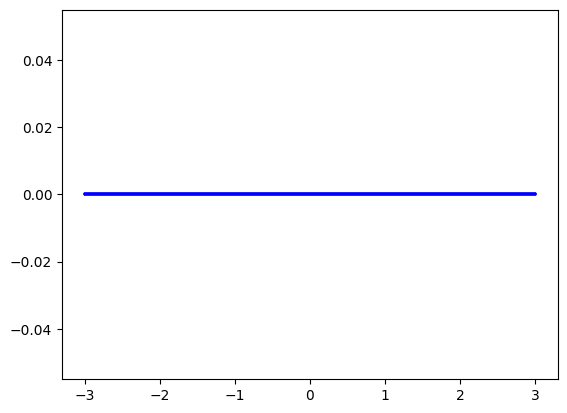

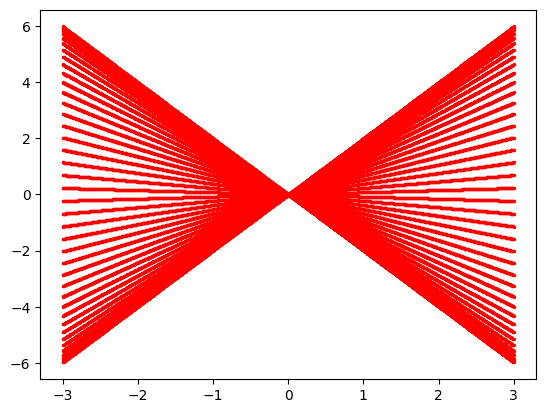

In [4]:
# Definining the Hamiltonian Matrix for general SSH Model

# Parameters
'''
n: number of sites
t: hopping
g: gamma, assymmetry in hooping
bc: bounary condition, either "PBC" or "OBC"
'''
# Varying parameter
L = 40
t1 = 1
g = 0
bc='OBC'


# Define Hamiltonian
def H_HN(L,t,g,bc='OBC'):
        H = np.zeros((L,L)) # Initialization
        for i in range(L-1):
                H[i,i+1] = t-g
        for i in range(L-1):
                H[i+1,i] = t+g
        if(bc=="PBC"):
          H[0,L-1]=t-g
          H[L-1,0]= t+g
        return H



npoint=1000; llim=-3; ulim=3
cdata = np.zeros((npoint,L), dtype=complex)
E_abs = np.zeros((npoint,L)) # Array of shape (npoint, L)
                                 # For each t1-set, L eigenvalues
E_real = np.zeros((npoint,L))
E_imag = np.zeros((npoint,L))
t1_array = np.linspace(llim,ulim,npoint, endpoint=True)
                                # Create t1 array
                                  # ranging from llim to ulim
                                  # endpoint=True => last value is ulim


for i, t1 in enumerate(t1_array):
#for t1 in t1_array:
        H = H_HN(L,t1,g,bc)
        E, psi = la.eig(H)

        ''' Sort eigenvalues '''
        idx = E.argsort()[::-1]
        E = E[idx]
        psi = psi[:,idx]
        cdata[i,:] = E

        E_abs = abs(cdata)
        E_real = cdata.real
        E_imag = cdata.imag

                # All L eigenvalues are stored in row format
                        # for each i

print('len(t1_array), len(E.real):',len(t1_array), len(E_real))
print('size(t1_array), size(E.real):',t1_array.size, E_real.size)
print('t1_array.shape, E_real.shape', t1_array.shape, E_real.shape)


plt.plot(t1_array, E_imag, c='blue')
plt.show()
for i in range(L):
  plt.scatter(t1_array, E_real[:,i], s=2, c='red')
plt.show()

## Plots

t1_array.shape, E_real.shape : (500,) (500, 20)

TODOs:
 Check if Re and Im parts of E can be ordered to get smooth line plots.




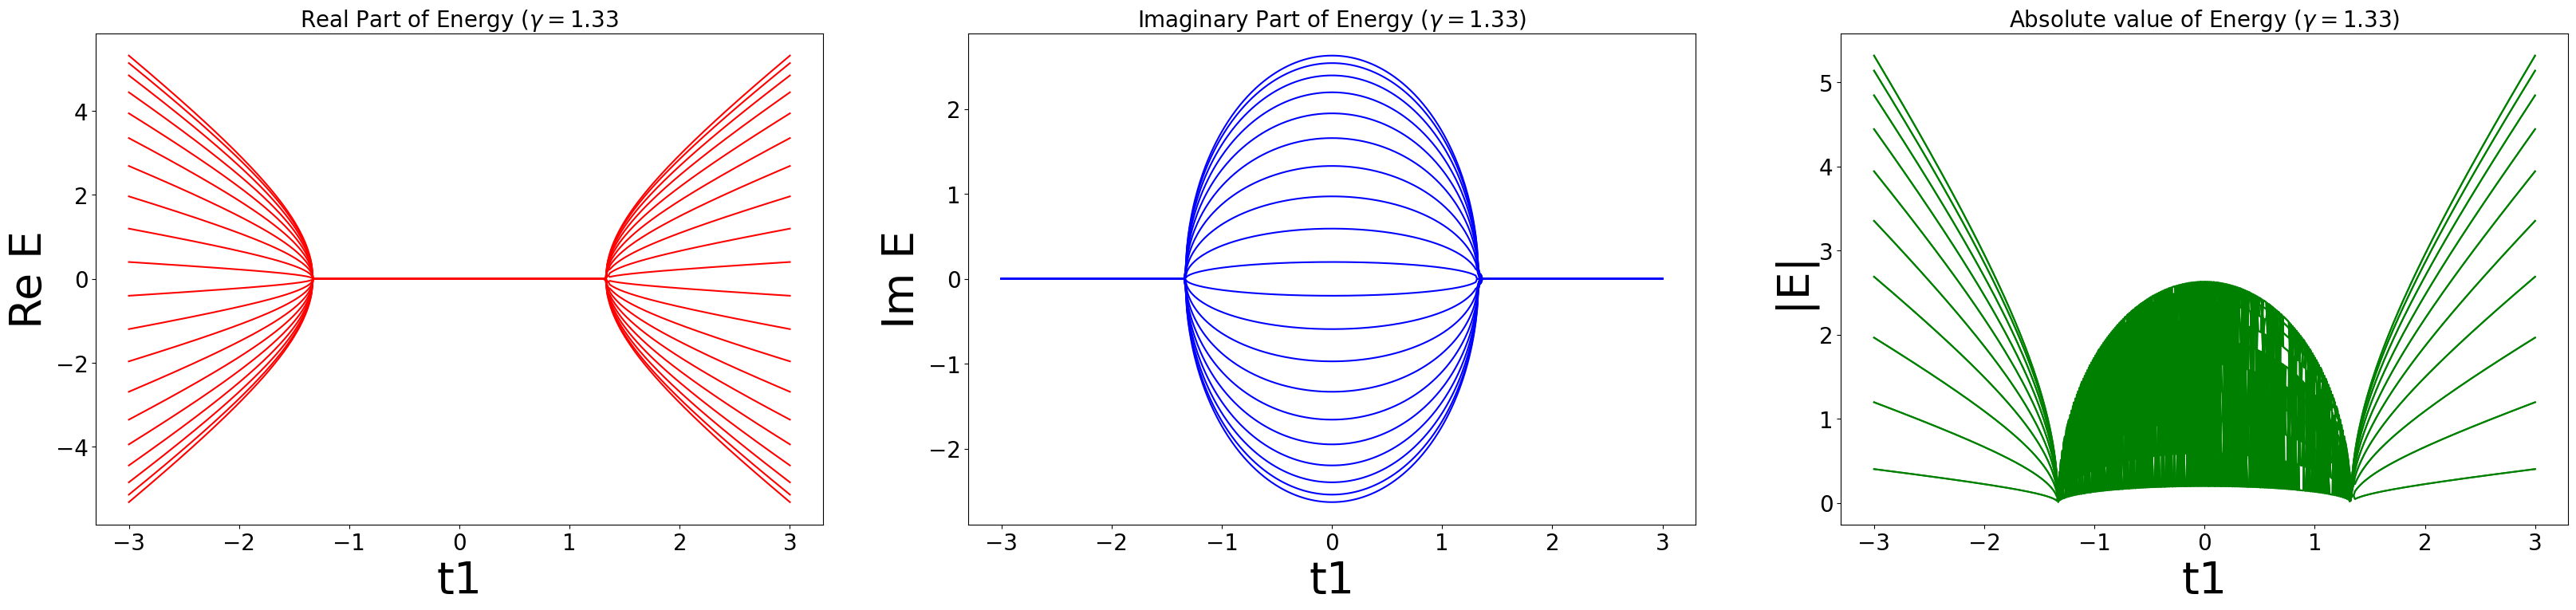

In [4]:
sz = 20 # default font size
axsz = 40 # axis label size
axttsz = 20 # axis title size
tsz = 20 # tick label font size
lgsz = 30 # legend size
ttsz = 20 # title font size
#plt.tick_params(axis='both', which='major', labelsize=tsz)

plt.rc('font', size=sz)          # controls default text sizes
plt.rc('axes', titlesize=axttsz) # fontsize of the axes title
plt.rc('axes', labelsize=axsz)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=tsz)    # fontsize of the tick labels
plt.rc('ytick', labelsize=tsz)    # fontsize of the tick labels
plt.rc('legend', fontsize=lgsz)    # legend fontsize
plt.rc('figure', titlesize=ttsz)  # fontsize of the figure title


def plot_bands(npoint,L,t,g,bc,plotstyle=None):

    fig, axs = plt.subplots(1,3, figsize=(40, 8))

    llim=-3; ulim=3
    cdata = np.zeros((npoint,L), dtype=complex)
    E_abs = np.zeros((npoint,L)) # Array of shape (npoint, L)  # For each t1-set, L eigenvalues
    E_real = np.zeros((npoint,L))
    E_imag = np.zeros((npoint,L))

    t1_array = np.linspace(llim,ulim,npoint)

    #print('t1_array.shape, E_abs.shape',t1_array.shape, E_abs.shape)

    for i, t1 in enumerate(t1_array):
        E, psi = la.eig(H_HN(L,t1,g,bc)) # find eigenenergies and eigenvectors

        ''' Sort eigenvalues '''
        idx = E.argsort()[::-1]
        E = E[idx]
        psi = psi[:,idx]
        cdata[i,:] = E
        E_abs = abs(cdata)
        E_real = np.sort(cdata.real)
        E_imag = np.sort(cdata.imag)

        ''' will see later
        idx1 = E_real.argsort()[::-1]
        idx2 = E_imag.argsort()[::-1]
        E_real = E_real[idx1]
        E_imag = E_imag[idx2]
        '''

        ''' Sort eigenvalues
                idx = E.argsort()[::-1]
                E = E[idx]
                psi = psi[:,idx]
                cdata[i,:] = E
                absdata = abs(cdata)
                redata = cdata.real
                imdata = cdata.imag
        '''

        #E_imag = cdata.imag
                # All L eigenvalues are stored in row format
                        # for each i

        #E_imag[abs(E_imag) < 1E-5] = 0
        E_imag = np.where(abs(E_imag) < 1.E-5, 0, E_imag)


    print('t1_array.shape, E_real.shape :',t1_array.shape, E_real.shape)

    if plotstyle == None:
     axs[0].plot(t1_array, E_real, c='red')
     axs[1].plot(t1_array, E_imag, c='blue')
     axs[2].plot(t1_array, E_abs, c='green')
    else:
     for i in range(L):
       axs[0].scatter(t1_array, E_real[:,i], s=2, c='red')
       axs[1].scatter(t1_array, E_imag[:,i], s=2, c='blue')
       axs[2].scatter(t1_array, E_abs[:,i], s=2, c='green')

    axs[0].set_ylabel("Re E")
    axs[0].set_xlabel("t1")
    axs[0].set_title(f"Real Part of Energy ($\gamma=${g}")

    axs[1].set_ylabel("Im E")
    axs[1].set_xlabel("t1")
    axs[1].set_title(f"Imaginary Part of Energy ($\gamma=${g})")


    axs[2].set_ylabel("|E|")
    axs[2].set_xlabel("t1")
    axs[2].set_title(f"Absolute value of Energy ($\gamma=${g})")

    print()
    print('TODOs:\n Check if Re and Im parts of E can be ordered to get smooth line plots.\n')
    print()

    #plt.savefig(f"PBC_t2={t2}, t3={t3},g={g},h=

npoint = 500
L = 20
t = 1.0
g = 1.33
bc = 'OBC'
plot_bands(npoint,L,t,g,bc)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


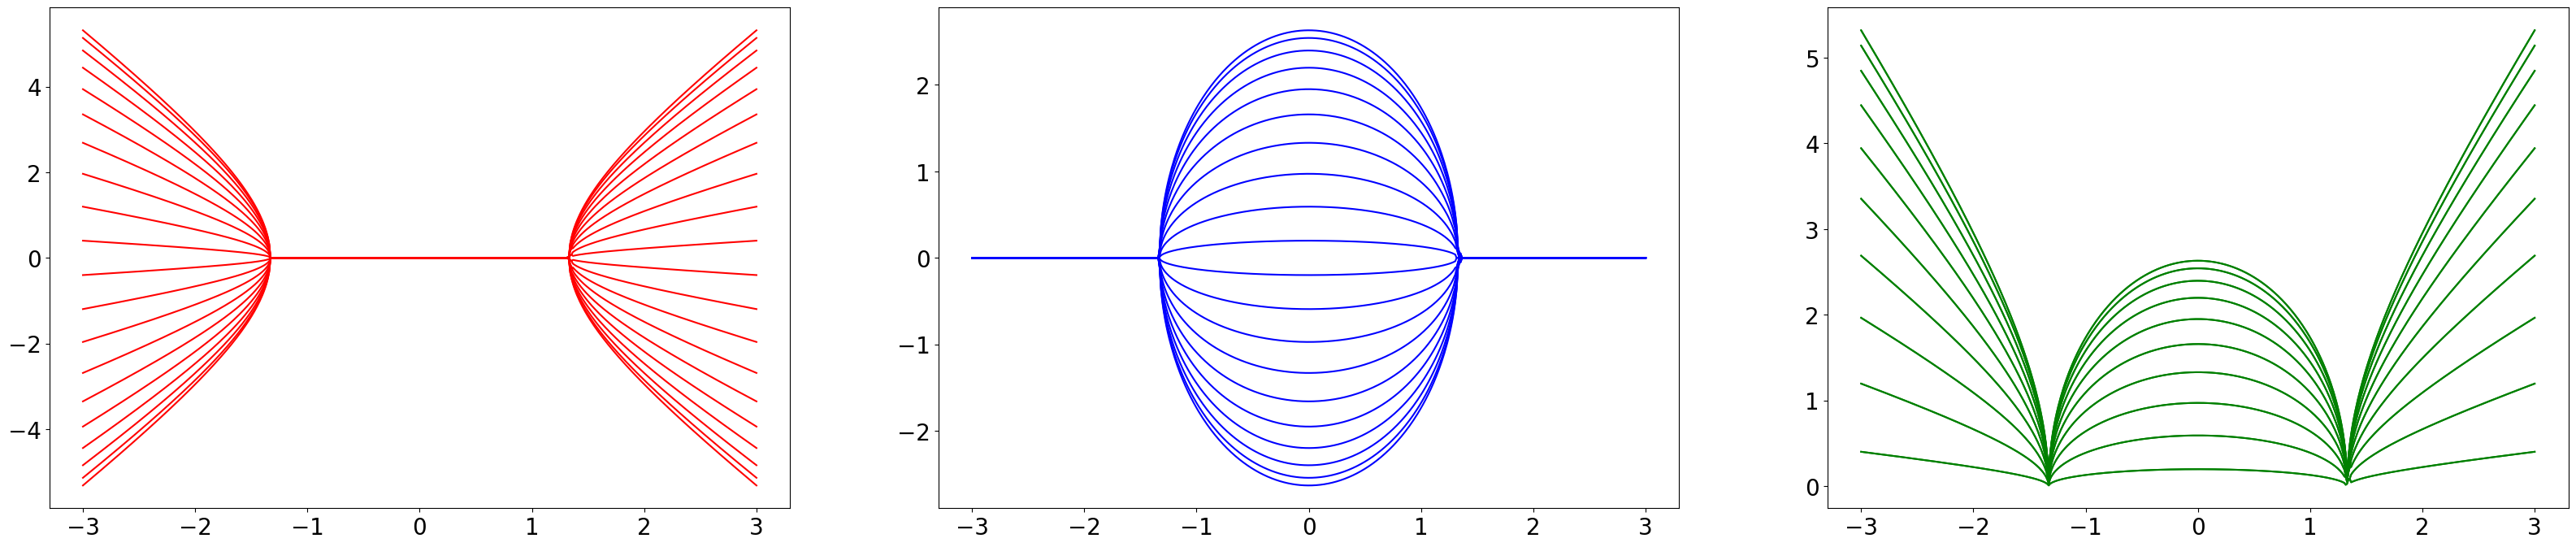

In [5]:
npoint = 500
L = 20
t = 1.0
g = 1.33
bc = 'OBC'


llim=-3
ulim=3


def plot_bands_1(npoint,L,t,g,bc,plotstyle=None):

    #fig, axs = plt.subplots(1,3, figsize=(40, 8))

    llim=-3; ulim=3
    cdata = np.zeros((npoint,L), dtype=complex)
    E_abs = np.zeros((npoint,L)) # Array of shape (npoint, L)  # For each t1-set, L eigenvalues
    E_real = np.zeros((npoint,L))
    E_imag = np.zeros((npoint,L))

    t1_array = np.linspace(llim,ulim,npoint)
    Tot_E_real=[]
    Tot_E_imag=[]
    Tot_E_abs=[]
    #print('t1_array.shape, E_abs.shape',t1_array.shape, E_abs.shape)
    for i in t1_array:
      E= la.eigvals(H_HN(L,i,g,bc))
      #print('i=',i,'E =',E) #,'E.imag =',E.imag)
      E_real= np.sort(E.real)
      E_imag=np.sort(E.imag)
      E_abs=np.sort(abs(E))
      Tot_E_real.append(E_real)
      Tot_E_imag.append(E_imag)
      Tot_E_abs.append(E_abs)
    return Tot_E_real,Tot_E_imag,Tot_E_abs
A,B,C=plot_bands_1(npoint,L,t,g,bc, "scatter");

t1_array = np.linspace(llim,ulim,npoint)
fig,axs = plt.subplots(1,3, figsize=(40, 8));
for i in range(len(A[0])):
  En_arr=np.zeros(len(A),dtype=complex)
  En_imag=np.zeros(len(A))
  En_abs=np.zeros(len(A))
  for j in range(len(A)):
    En_arr[j] = (A[j][i])
    En_imag[j] = (B[j][i])
    En_abs[j] = (C[j][i])
  #En_imag=En_arr.imag
  #En_abs=abs(En_arr)
  axs[0].plot(t1_array, En_arr,c="red")
  axs[1].plot(t1_array, En_imag, c="blue")
  axs[2].plot(t1_array, En_abs,c="green")


In [6]:
sz = 10 # default font size
axsz = 20 # axis label size
axttsz = 20 # axis title size
tsz = 15 # tick label font size
lgsz = 15 # legend size
ttsz = 10 # title font size
#plt.tick_params(axis='both', which='major', labelsize=tsz)

plt.rc('font', size=sz)          # controls default text sizes
plt.rc('axes', titlesize=axttsz) # fontsize of the axes title
plt.rc('axes', labelsize=axsz)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=tsz)    # fontsize of the tick labels
plt.rc('ytick', labelsize=tsz)    # fontsize of the tick labels
plt.rc('legend', fontsize=lgsz)    # legend fontsize
#plt.rc('figure', titlesize=ttsz)  # fontsize of the figure title (not working!)
plt.rc('axes', titlesize=ttsz) # fontsize of the figure title (working)

def plot_ImE_vs_ReE(L,t,g, plotstyle=None):
    E_PBC, psi1=la.eig(H_HN(L,t,g,'PBC'))
    E_OBC, psi2=la.eig(H_HN(L,t,g,'OBC'))
    Re_PBC = E_PBC.real
    Im_PBC = E_PBC.imag
    both_PBC = sorted(zip(Re_PBC,Im_PBC)) # Re_PBC will be sorted in
                              # ascending order and Im_PBC will be ordered
    Re_PBC, Im_PBC = zip(*both_PBC)

    Re_OBC=E_OBC.real
    Im_OBC=E_OBC.imag
    both_OBC = sorted(zip(Re_OBC,Im_OBC))
    Re_OBC, Im_OBC = zip(*both_OBC)

    print('Re_PBC =',Re_PBC,'\n Im_OBC =',Im_PBC)
    #print('Re_OBC =',Re_OBC,' Im_OBC',Im_OBC)

    if plotstyle == None:
      plt.plot(Re_PBC, Im_PBC, '-o', label='PBC', c='orange')
      plt.plot(Re_OBC, Im_OBC, '--*', label='OBC', c='magenta')
    else:

      for i in range(L-1):
         plt.scatter(Re_PBC[i], Im_PBC[i], s=30, c='orange')
         plt.scatter(Re_OBC[i], Im_OBC[i], s=30, c='magenta')
      plt.scatter(Re_PBC[L-1], Im_PBC[L-1], s=30, label='PBC', c='orange')
      plt.scatter(Re_OBC[L-1], Im_OBC[L-1], s=30, label='OBC', c='magenta')

    plt.xlabel('Re E')
    plt.ylabel('Im E')
    plt.title(f"Im E vs. Re E plot ($t={t}, \gamma={g}$)")
    plt.legend()
    plt.show()

Re_PBC = (np.float64(-1.999693658495974), np.float64(-1.9973584698980185), np.float64(-1.9973584698980185), np.float64(-1.990358358045317), np.float64(-1.990358358045317), np.float64(-1.9787096720234525), np.float64(-1.9787096720234525), np.float64(-1.9624396178783843), np.float64(-1.9624396178783843), np.float64(-1.9415861950754354), np.float64(-1.9415861950754354), np.float64(-1.916198107749826), np.float64(-1.916198107749826), np.float64(-1.8863346509558496), np.float64(-1.8863346509558496), np.float64(-1.852065572180602), np.float64(-1.852065572180602), np.float64(-1.8134709084454275), np.float64(-1.8134709084454275), np.float64(-1.7706407993757745), np.float64(-1.7706407993757745), np.float64(-1.7236752766759273), np.float64(-1.7236752766759273), np.float64(-1.672684030500307), np.float64(-1.672684030500307), np.float64(-1.617786153267062), np.float64(-1.617786153267062), np.float64(-1.5591098615121748), np.float64(-1.5591098615121748), np.float64(-1.4967921964338309), np.float64(

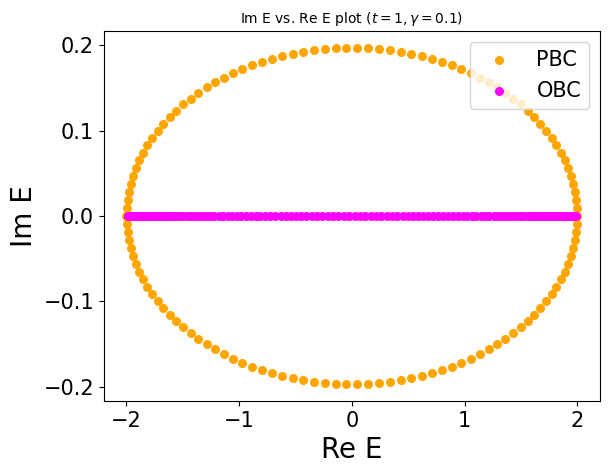

Re_PBC = (np.float64(-1.999693658495974), np.float64(-1.9973584698980185), np.float64(-1.9973584698980185), np.float64(-1.990358358045317), np.float64(-1.990358358045317), np.float64(-1.9787096720234525), np.float64(-1.9787096720234525), np.float64(-1.9624396178783843), np.float64(-1.9624396178783843), np.float64(-1.9415861950754354), np.float64(-1.9415861950754354), np.float64(-1.916198107749826), np.float64(-1.916198107749826), np.float64(-1.8863346509558496), np.float64(-1.8863346509558496), np.float64(-1.852065572180602), np.float64(-1.852065572180602), np.float64(-1.8134709084454275), np.float64(-1.8134709084454275), np.float64(-1.7706407993757745), np.float64(-1.7706407993757745), np.float64(-1.7236752766759273), np.float64(-1.7236752766759273), np.float64(-1.672684030500307), np.float64(-1.672684030500307), np.float64(-1.617786153267062), np.float64(-1.617786153267062), np.float64(-1.5591098615121748), np.float64(-1.5591098615121748), np.float64(-1.4967921964338309), np.float64(

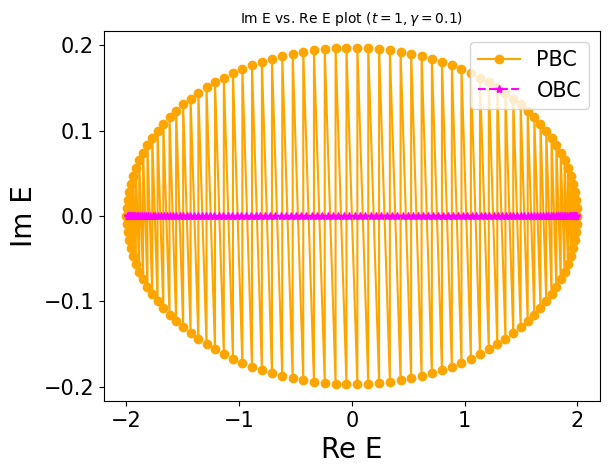

In [7]:
L=130
t = 1
g = 0.1
plot_ImE_vs_ReE(L,t,g,'s')

plot_ImE_vs_ReE(L,t,g)



In [8]:
import operator
x = [0, 7, 2, 4, 6, 9, 5, 8]

y = [1, 2, 3, 4, 5, 6, 7, 8]

L = sorted(zip(x,y))
#L = sorted(zip(x,y), key=operator.itemgetter(0))

new_x, new_y = zip(*L)

print('new_x =',new_x)
print('new_y =',new_y)


print(x[1::2])
print(x[-2::-2])


new_x = (0, 2, 4, 5, 6, 7, 8, 9)
new_y = (1, 3, 4, 7, 5, 2, 8, 6)
[7, 4, 9, 8]
[5, 6, 2, 0]


## **Winding Number**

/tmp/ipython-input-9-1286583466.py:86: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  winding_num = np.trapz(integrand, k_points) / (2 * np.pi * 1j)


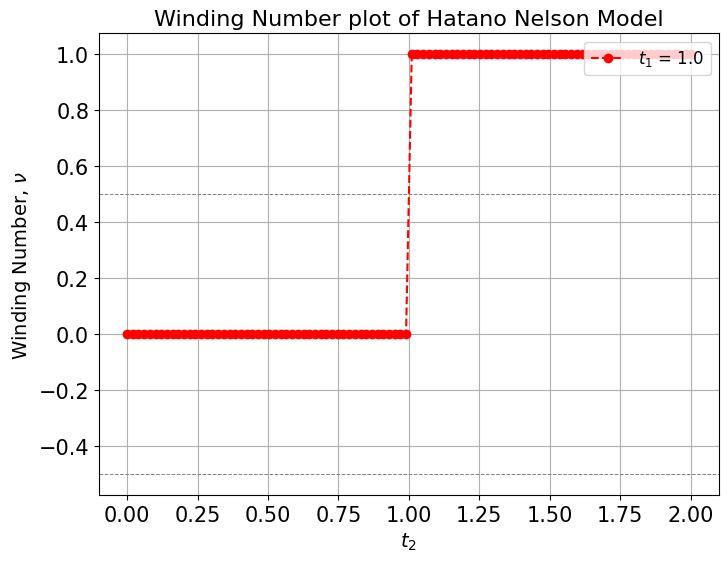

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def H_SSH(k, t1, t2):
    """ Returns the 2x2 Hamiltonian matrix for a given k, t1, and t2. """
    a = 1 # lattice const.
    return np.array([[0, t1 + t2 * np.exp(-1j* k*a)],
                     [t1 + t2 * np.exp(1j*k*a), 0]])
                # t1 = t+ = v (intracell hopping)
                # t2 = t- = w (intercell hopping)
                # Expectation:
                # (a) non-trivial topology ( winding no. \nu = 1 )
                #      for w > v (i.e. t2 < t1)
                # (b) trivial topology ( winding no. \nu = 0 )
                #      for v > w (i.e. t2 > t1)
                #

# ~~~~~~~~~~ Winding no: Method 1 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def wind_no(t1, t2, N_k=1000):
    """ Calculate the winding number for given t1 and t2. """
    k_grid = np.linspace(-np.pi, np.pi, N_k, endpoint=False)

    # Calculate the phase of the off-diagonal element
    phases = np.angle(t1 + t2 * np.exp(1j * k_grid))

    # Unwrap the phases to ensure continuity
    unwrapped_phases = np.unwrap(phases)

    # Calculate the difference in the unwrapped phase across the Brillouin zone
    phase_diff = abs(unwrapped_phases[-1] - unwrapped_phases[0])
                        # difference b/w BZ boundaries

    # Compute the winding number
    winding_num = phase_diff / (2 * np.pi)

    return int(np.round(winding_num))

# ~~~~~~~~~~ Winding no: Method 2 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def d_vector(k, t1, t2):
    """ Returns the d-vector for the SSH model at a given k. """
    d_x = t1 + t2 * np.cos(k)
    d_y = t2 * np.sin(k)
    return np.array([d_x, d_y, 0])

def wind_no2(t1, t2, num_k_points=500):
    """ Calculate the winding number using the d-vector cross product method. """
    k_points = np.linspace(-np.pi, np.pi, num_k_points, endpoint=False)
    dk = k_points[1] - k_points[0]

    # Compute d-vector and its normalized version
    d_vectors = np.array([d_vector(k, t1, t2) for k in k_points])
    d_vectors_norm = d_vectors / np.linalg.norm(d_vectors, axis=1)[:, None]

    # Compute the derivative of the normalized d-vector
    d_vectors_norm_derivative = np.gradient(d_vectors_norm, dk, axis=0)

    # Compute the cross product and extract the z-component
    cross_products = np.cross(d_vectors_norm, d_vectors_norm_derivative)
    cross_product_z = cross_products[:, 2]

    # Integrate over k to find the winding number
    winding_num = np.trapz(cross_product_z, k_points) / (2 * np.pi)

    return int(np.round(winding_num))

# ~~~~~~~~~ Winding no: Method 3 ~~~~~~~~~~~~~~~~~~~~~~~
def h(k, t1, t2):
    return t1 + t2*(np.cos(k) - 1j*np.sin(k))
             # d_x - i d_y
    #return t1 + t2 * np.exp(-1j * k)

def dh_dk(k, t2):
    return t2 * (-np.sin(k) - 1j*np.cos(k))
    #return -1j * t2 * np.exp(-1j * k)

def wind_no3(t1, t2, num_k_points=10000):
    k_points = np.linspace(-np.pi, np.pi, num_k_points, endpoint=False)
    dk = k_points[1] - k_points[0]

    h_values = h(k_points, t1, t2)
    dh_dk_values = dh_dk(k_points, t2)

    integrand = dh_dk_values / h_values

    winding_num = np.trapz(integrand, k_points) / (2 * np.pi * 1j)
    winding_num = abs(winding_num)

    return np.round(winding_num)
          # need to round since W has to be an integer.
          # if not rounded, more k points have to be taken.
    #return winding_num

    #return int(np.round(np.real(winding_num)))

# ~~~~~~~~~ Plot winding no against hopping parameter ~~~~~~~~~~~~~~~~~~
def plot_winding():
   # Set parameters
   t2_grid = np.linspace(0, 2, 100)
   t1 = 1.0  # Fixed hopping parameter

   # Calculate winding numbers
   #winding_numbers = np.array([wind_no(t1, t2) for t2 in t2_grid])
   #winding_numbers = np.array([wind_no2(t1, t2) for t2 in t2_grid])
   winding_numbers = np.array([wind_no3(t1, t2) for t2 in t2_grid])

   # Plot the results
   plt.figure(figsize=(8, 6))
   plt.plot(t2_grid, winding_numbers, label=f'$t_1$ = {t1}', color='r', marker='o', ls='--')
   #plt.scatter(t2_grid, winding_numbers, label='Winding Number', color='b', marker='o')
   plt.xlabel(r'$t_2$', fontsize=14)
   plt.ylabel(r'Winding Number, $\nu$', fontsize=14)
   plt.title('Winding Number plot of Hatano Nelson Model', fontsize=16)
   plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.7)
   plt.axhline(y=-0.5, color='gray', linestyle='--', linewidth=0.7)
   plt.grid(True)
   plt.legend(loc='upper right', fontsize=12, title_fontsize=15)
   plt.show()

plot_winding()


